# Bank Marketing Campaign 

**The aim of this notebook is to perform EDA to generate insights to help ABC Bank identify the right customers to target
for their marketing campaign.**


# Exploratory Data Analysis

In this notebook, we will go through the following steps. 

1. Data Preparation
   
   - Importing libraries
   - Data Ingestion
   - Data Overview/(Data Intake)
   - Initial Categorical & Numerical variables Analysis (Overall Picture)
   - Data Cleaning and Transformation
   

2. **Data Analysis**
            
    - Target Variable Analysis
    
    - Correlation Analysis
    
        a. Categorical versus categorical
        
        b. Numerical versus numerical
        
        c. Categorical versus numerical 
    
    - Time Series Analysis 
    

3. Communication with stakeholders

===================================================================================================

# Data Preparation

 ## Import Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data Ingestion

### Testutility file

In [3]:
%%writefile testutility.py
import logging
import os
import subprocess
import yaml 
import pandas as pd
import datetime
import gc
import re

#################
# File Reading #
#################

def read_config_file(filepath):
  with open(filepath, "r") as stream:
    try:
      return yaml.safe_load(stream)
    except yaml.YAMLError as exc:
      logging.error(exc)

Overwriting testutility.py


### Yaml file

In [4]:
%%writefile file.yaml
file_type: csv
dataset_name: testfile
file_name: bank-additional-full
table_name: edsurv
inbound_delimeter: ";"
outbound_delimeter: "|"

Overwriting file.yaml


In [5]:
# Read Config file
import testutility as util
config_data = util.read_config_file("file.yaml")

In [6]:
config_data["file_name"]

'bank-additional-full'

In [7]:
# read the files using config file
file_type = config_data["file_type"]
source_file = "./" + config_data["file_name"] + f".{file_type}"

# print("", source_file)
df = pd.read_csv(source_file, config_data["inbound_delimeter"])

## Data Overview

In [8]:
df.shape

(41188, 21)

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
import os
def summary(df, source_file):
    rows = len(df)
    columns = len(df.columns)
    print(f"Number of Rows: {rows}")
    print(f"Number of Columns: {columns}")
    file_size = os.path.getsize(source_file)
    print(f"Size: {file_size} bytes")

In [12]:
summary(df, source_file)

Number of Rows: 41188
Number of Columns: 21
Size: 5834924 bytes


In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [14]:
df.duplicated().sum()

12

Here we have 41k records. So removing record will not affect our existing dataset. So we have drop 12 duplicate records.

In [15]:
df = df.drop_duplicates()

In [16]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [17]:
df.duplicated().sum()

0

In [18]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Now, as per above result,  we can see there is no any duplicate value nor null value.

## Initial Categorical & Numerical variables Analysis (Overall Picture)

### Variable Types

#### Target Variable

In [19]:
target_var = ['y']
target = df[target_var]
target_var

['y']

In [20]:
df["y"].unique()

array(['no', 'yes'], dtype=object)

<AxesSubplot:title={'center':'Target y'}, xlabel='y', ylabel='% outcomes'>

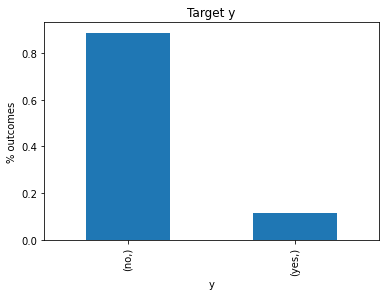

In [21]:
target.value_counts(normalize=True).plot(kind="bar", ylabel = "% outcomes", title = "Target y")

The data suggest an imbalance in the target variable. This can affect the performance of our model so an oversampling technique must be applied before model building. 

#### Categorical Variables

In [22]:
categorical_var = [var for var in df.columns 
                   if df[var].dtype=="O" and 
                   var not in target_var and 
                   var not in ["month", "day_of_week"]]
categorical_var

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome']

In [23]:
# let's explore the values of these categorical variables
for var in categorical_var:
    print(var, df[var].unique())
    print()

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital ['married' 'single' 'divorced' 'unknown']

education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default ['no' 'unknown' 'yes']

housing ['no' 'yes' 'unknown']

loan ['no' 'yes' 'unknown']

contact ['telephone' 'cellular']

poutcome ['nonexistent' 'failure' 'success']



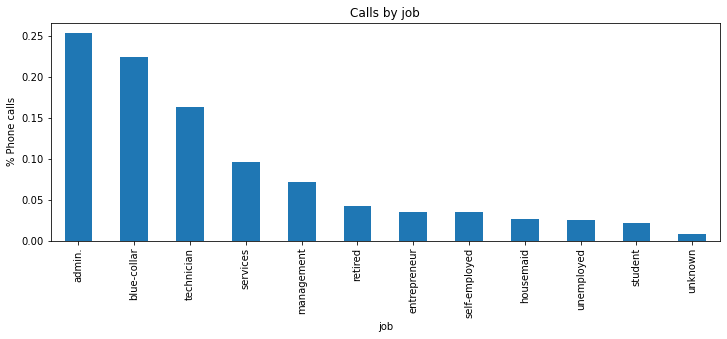

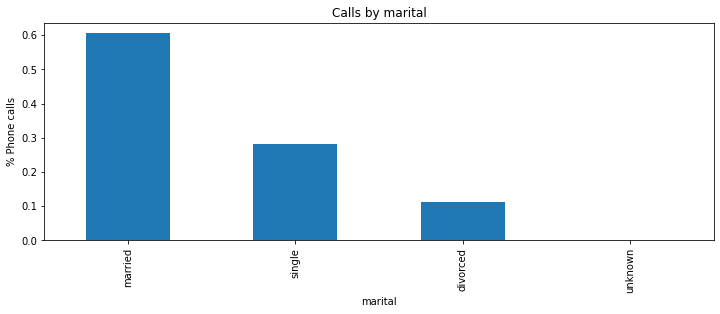

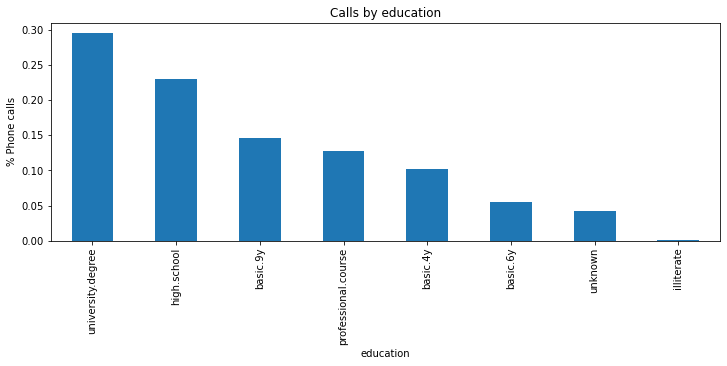

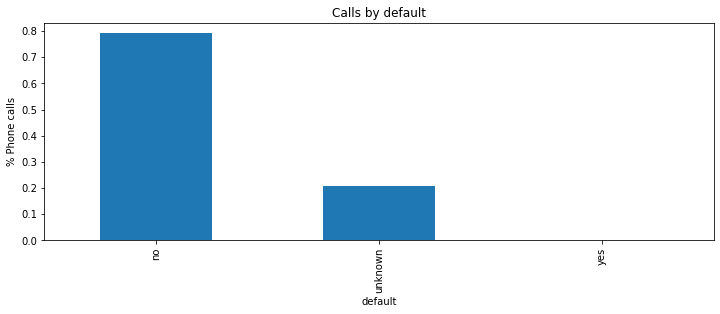

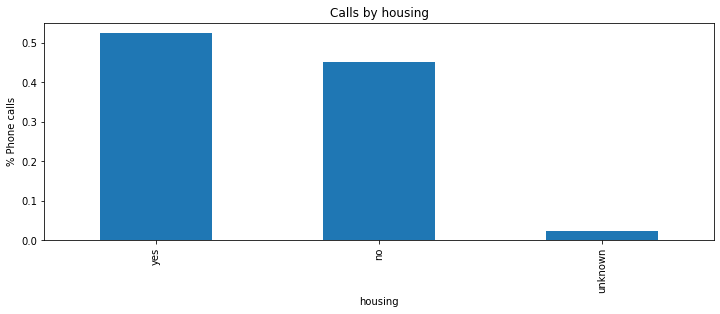

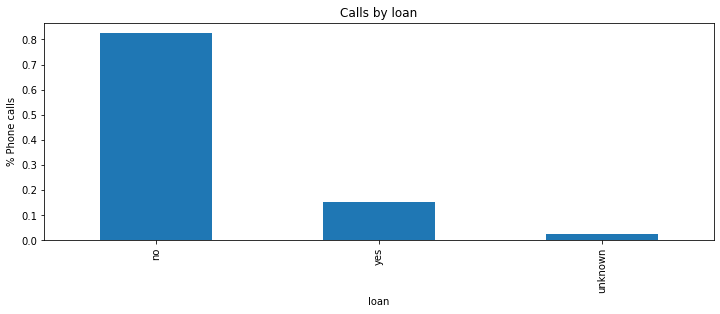

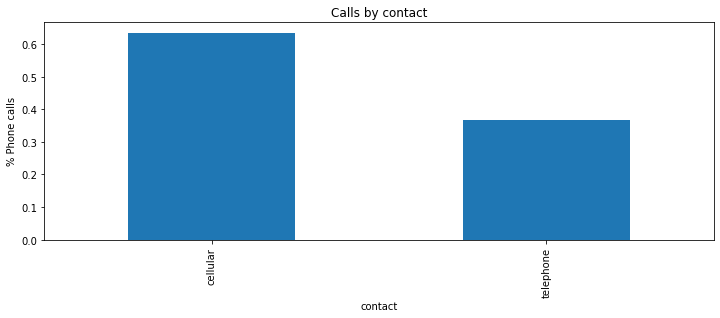

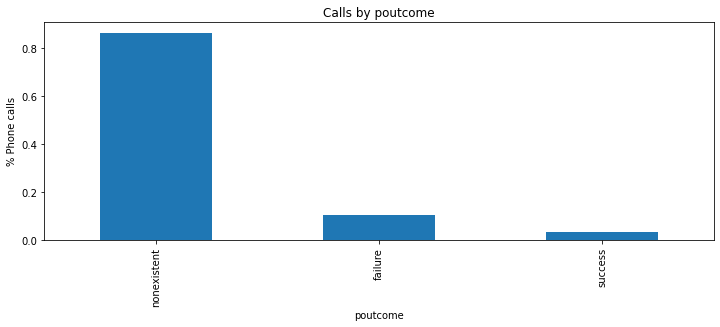

In [24]:
for var in categorical_var:
    
    plt.figure(figsize=(12,4))
    
    # plot transformed variable vs sale price
    df[var].value_counts(normalize = True).plot(
    kind="bar",
    xlabel=f"{var}",
    ylabel="% Phone calls",
    title=f"Calls by {var}"
    )
                
    plt.show()

#### Numeric Variables

In [25]:
numerical_var = [var for var in df.columns if var not in categorical_var + target_var and var not in ["month", "day_of_week"]]
numerical_var

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

#### Temporal Variables 

In [26]:
temporal_var = [var for var in df.columns if var =="month" or var=="day_of_week"]
temporal_var

['month', 'day_of_week']

#### Discreete Variable 

In [27]:
discrete_var = [var for var in numerical_var if len(df[var].unique()) < 32 and var not in temporal_var]
discrete_var

['pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed']

##### Continuous variables 

In [28]:
# make list of continuous variables
continuous_var = [
    var for var in numerical_var if var not in discrete_var+temporal_var]
continuous_var

['age', 'duration', 'campaign', 'euribor3m']

In [29]:
# let's explore the values of these temporal variables

for var in continuous_var:
    print(var, df[var].unique())
    print()

age [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

duration [ 261  149  226 ... 1246 1556 1868]

campaign [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]

euribor3m [4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 4.12  4.076
 4.021 3.901 3.879 3.853 3.816 3.743 3.669 3.563 3.488 3.428 3.329 3.282
 3.053 1.811 1.799 1.778 1.757 1.726 1.703 1.687 1.663 1.65  1.64  1.629
 1.614 1.602 1.584 1.574 1.56  1.556 1.548 1.538 1.531 1.52  1.51  1.498
 1.483 1.479 1.466 1.453 1.445 1.435 1.423 1.415 1.4

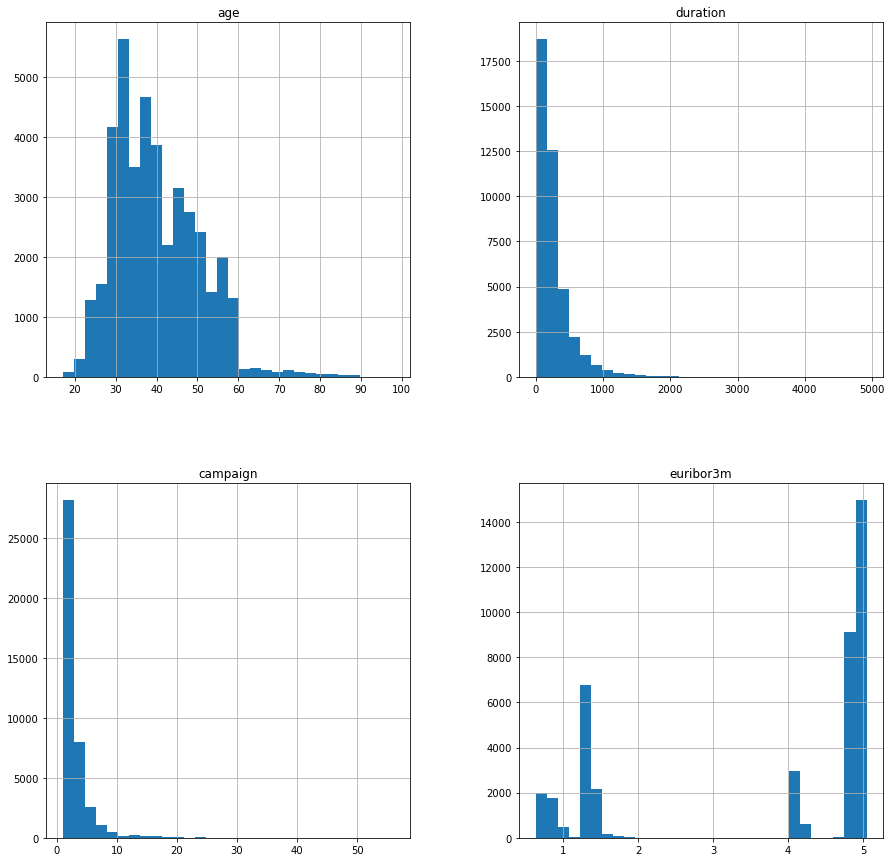

In [30]:
# lets plot histograms for all continuous variables
df[continuous_var].hist(bins=30, figsize=(15,15))
plt.show()

In [31]:
# let's explore the values of these discrete variables

for var in discrete_var:
    print(var, df[var].unique())
    print()

pdays [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]

previous [0 1 2 3 4 5 6 7]

emp.var.rate [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]

cons.price.idx [93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]

cons.conf.idx [-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]

nr.employed [5191.  5228.1 5195.8 5176.3 5099.1 5076.2 5017.5 5023.5 5008.7 4991.6
 4963.6]



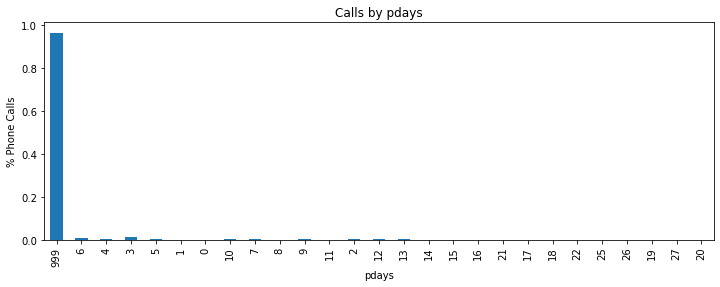

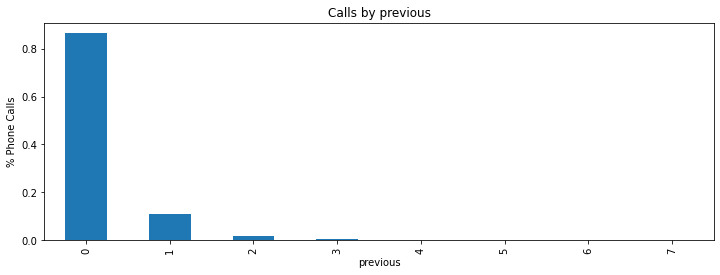

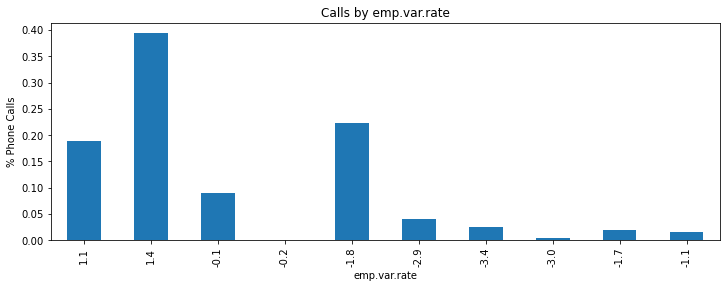

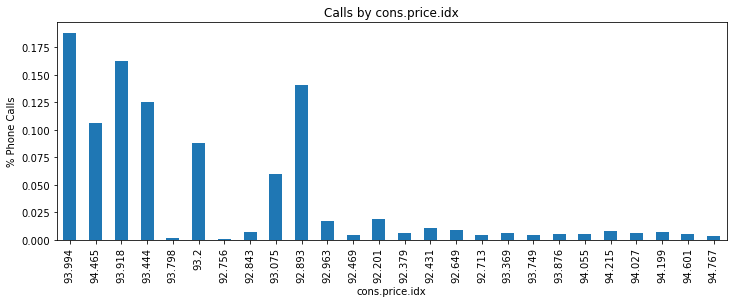

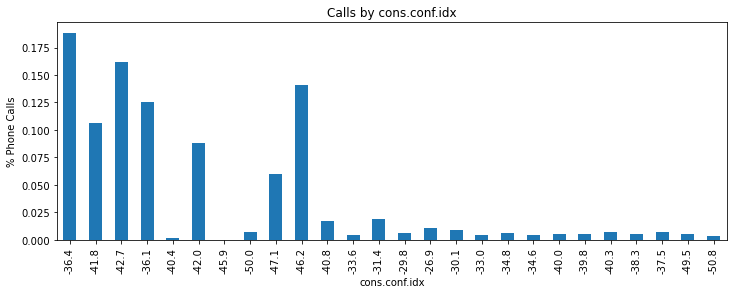

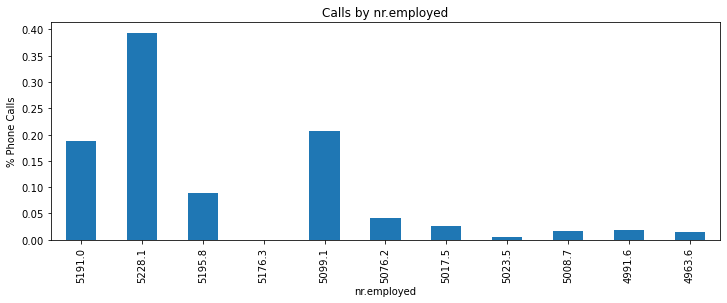

In [32]:
for var in discrete_var:
    
    plt.figure(figsize=(12,4))
    
    # plot transformed variable vs sale price
    df[var].value_counts(normalize = True, sort = False).plot(
    kind="bar",
    xlabel=f"{var}",
    ylabel="% Phone Calls",
    title=f"Calls by {var}"
    )
                
    plt.show()

In [33]:
# let's explore the values of these temporal variables

for var in temporal_var:
    print(var, df[var].unique())
    print()

month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']



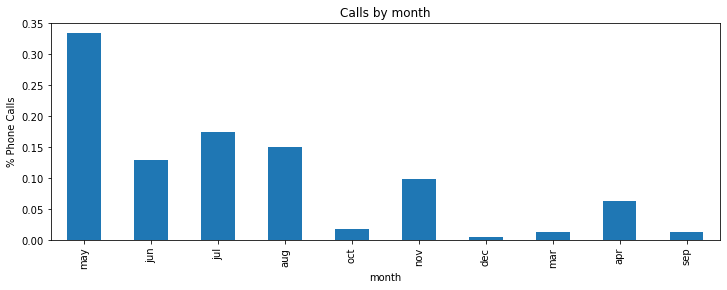

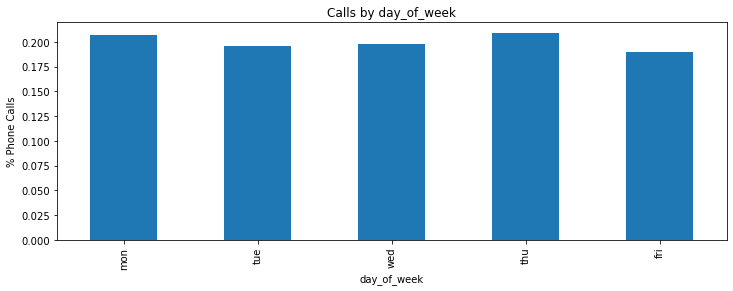

In [34]:
for var in temporal_var:
    
    plt.figure(figsize=(12,4))
    
    # plot transformed variable vs sale price
    df[var].value_counts(normalize = True, sort = False).plot(
    kind="bar",
    xlabel=f"{var}",
    ylabel="% Phone Calls",
    title=f"Calls by {var}"
    )
                
    plt.show()

## Data Cleaning and Transformation

NOTES:
- Duration is a variable we can explore during EDA for business purposes to decide if we should try engaging the person for longer time on the call or not. This variable should not be included in the model becuase Duration is obtained after the call is made to the potential client so if the target client has never received calls, this feature is not very useful.
- month mapped to numerical values and another column of day-month can be generated for EDA in furture.
- No missing values but there are some with unknown values in loan housing etc. Consider deleting them
- There is a 999 value existing in pdays column meaning the customer has not been contacted before. We should change it to 0
- Education column has some values which contain "." character which can be cleaned.
- Outliers need to be handled
- Age column can be log transformed

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

Data Types of all the features are correctly assigned so we do not need to change anything.

### Cleaning Education values

In [36]:
df['education'].replace({'basic.4y' : 'basic 4y', 'basic.6y' : 'basic 6y', 'basic.9y' : 'basic 9y', 'high.school' : 'high school', 'professional.course' : 'professional course', 'university.degree' : 'university degree'}, inplace = True)
df['job'].replace({'admin.' : 'admin'}, inplace = True)
df.head(n=40)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic 4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic 6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic 9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin,married,professional course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [37]:
df['education'].unique()

array(['basic 4y', 'high school', 'basic 6y', 'basic 9y',
       'professional course', 'unknown', 'university degree',
       'illiterate'], dtype=object)

### Missing Values

In [38]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Fortunately, there are no missing values in the dataset. However, after exploring we find that 5 of the categorical variables have an "unknown" value. Those are the only missing values which do not need to be dealt with for now as the "unknown" category is already created for them. However, deleting them will not affect the dataset so much as they constitute a very small proportion of the dataset. So, we will consider deleting them.

In [39]:
# To handle the missing values, we first turn the 'unknown' observations to NaNs
df = df.replace('unknown', np.nan)
df.isnull().sum()

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [40]:
#using partial deletion of the missing values on the job and marital attributes as those attributes do not show a strong relationship between the known/unknown status and target response.
df = df.dropna(subset=['job', 'marital'])

### Mapping month column

In [41]:
m = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}

In [42]:
df["month"] = df["month"].map(m)

In [43]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic 4y,no,no,no,telephone,5,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high school,NaN,no,no,telephone,5,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high school,no,yes,no,telephone,5,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic 6y,no,no,no,telephone,5,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high school,no,no,yes,telephone,5,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Creating month-day column

In [44]:
df["month-day"] = df['month'].astype('str') + "-" + df['day_of_week'].astype('str')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month-day
0,56,housemaid,married,basic 4y,no,no,no,telephone,5,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5-mon
1,57,services,married,high school,NaN,no,no,telephone,5,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5-mon
2,37,services,married,high school,no,yes,no,telephone,5,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5-mon
3,40,admin,married,basic 6y,no,no,no,telephone,5,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5-mon
4,56,services,married,high school,no,no,yes,telephone,5,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5-mon


### pdays column value correction

In [45]:
df['pdays'].mask(df['pdays'] == 999, 0, inplace=True)

In [46]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month-day
0,56,housemaid,married,basic 4y,no,no,no,telephone,5,mon,...,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5-mon
1,57,services,married,high school,NaN,no,no,telephone,5,mon,...,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5-mon
2,37,services,married,high school,no,yes,no,telephone,5,mon,...,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5-mon
3,40,admin,married,basic 6y,no,no,no,telephone,5,mon,...,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5-mon
4,56,services,married,high school,no,no,yes,telephone,5,mon,...,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5-mon


# Outlier

we are using box plot method to detect outlier.
Outlier points</b> = Q3 + 1.5 IQR(Upper Quartile) , Q1 - 1.5 IQR(Lower Quartile)

In [47]:
numerical_var

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

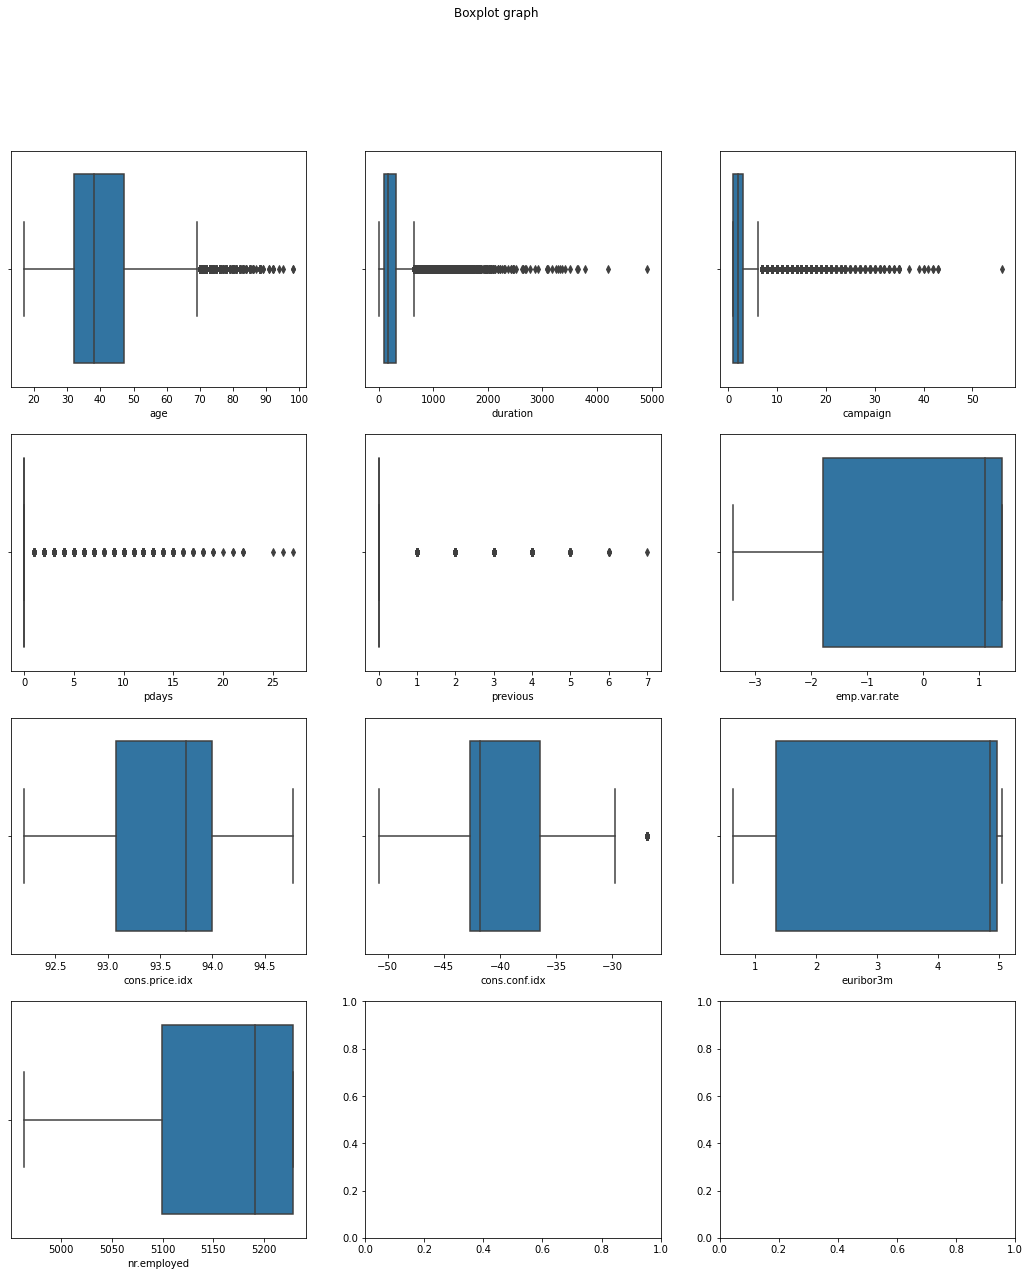

In [48]:
fig,axes = plt.subplots(4, 3, figsize=(18, 20))
fig.suptitle('Boxplot graph')
count = 0;
for i in range(4):
    for j in range(3):
        if( count < len(numerical_var)):
            sns.boxplot(ax=axes[i,j], x=numerical_var[count], data=df)
            count = count + 1

From the above Boxplot graph, we can clearly see that age, duration, campaign and cons.conf.idx contain outlier. However, after carefully analyzing the variables, we see that age follows a log normal distribution and we can perform a log transformation to handle most of the age outliers. Also, age outliers are not some problem. It may give us valuable information about how different age groups buy deposit. Similarly, pdays have outliers due to the fact that most of the values are 0 due to the customer not being contacted before. For this reason, this variable contain valuable information in the outliers. Outliers present in the Campaign variable also shows important info about how people respond if they are contacted multiple times and therefore should not be removed. Same goes for previous variable. 

The duration variable contains some outliers which are too big values which is unusual. For example the largest value in the distribution is about 5000 seconds i.e, 83 minutes. Although not impossible, Its hard to beleive a customer would talk so long about the deposit. The call might be made to a relative. We should check if the customers who stayed on call for very long bought the term deposit or not to decide if we should remove the outliers or not. 

In [49]:
df[df['duration'] > 3500]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month-day
7727,37,unemployed,married,professional course,no,yes,no,telephone,5,fri,...,0,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,yes,5-fri
13820,31,technician,married,professional course,no,no,no,cellular,7,thu,...,0,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes,7-thu
22192,52,blue-collar,married,basic 4y,no,no,no,telephone,8,thu,...,0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,yes,8-thu
24091,33,technician,single,professional course,no,yes,no,telephone,11,mon,...,0,0,nonexistent,-0.1,93.200,-42.0,4.406,5195.8,no,11-mon
36043,28,blue-collar,married,basic 9y,no,yes,no,cellular,5,tue,...,3,2,success,-1.8,92.893,-46.2,1.266,5099.1,no,5-tue
40537,27,admin,single,high school,no,no,no,telephone,8,fri,...,0,0,nonexistent,-1.7,94.027,-38.3,0.888,4991.6,no,8-fri


Among the 6 people that with calls greater than 3500 seconds, 3 of them bought the deposit which means that the long duration of calls is not just a mistake or call to a relative. The customers were interested in the deposit or the salesperson was a smooth talker. Note also that 5 of these people are not contacted before which means that the duration represent one time call. We will also keep the outliers for duration as it is also a valuable information and removing them to fit the distribution would not be very wise.

cons.conf.idx contains one outlier that looks suspicious. However note that the outlier is not far away from the distribution. 

In [50]:
df[df['cons.conf.idx'] > -30]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month-day
37887,53,admin,married,university degree,NaN,yes,no,cellular,9,tue,...,0,0,nonexistent,-3.4,92.379,-29.8,0.819,5017.5,no,9-tue
37888,32,admin,single,university degree,no,yes,yes,cellular,9,tue,...,0,0,nonexistent,-3.4,92.379,-29.8,0.819,5017.5,no,9-tue
37889,52,admin,married,NaN,no,no,no,telephone,9,tue,...,0,0,nonexistent,-3.4,92.379,-29.8,0.819,5017.5,no,9-tue
37890,39,entrepreneur,married,basic 6y,no,yes,no,cellular,9,tue,...,16,1,success,-3.4,92.379,-29.8,0.819,5017.5,yes,9-tue
37891,32,admin,single,university degree,no,yes,no,cellular,9,tue,...,0,0,nonexistent,-3.4,92.379,-29.8,0.819,5017.5,no,9-tue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38596,69,retired,married,basic 4y,no,yes,yes,cellular,10,fri,...,0,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,yes,10-fri
38597,18,student,single,basic 6y,no,no,yes,cellular,10,fri,...,0,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,yes,10-fri
38598,59,retired,divorced,basic 4y,no,yes,no,telephone,10,fri,...,0,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,no,10-fri
38599,37,admin,single,university degree,no,no,no,cellular,10,fri,...,0,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,yes,10-fri


Again, there is not good enough reason to remove the outliers in the cons.conf.idx

#### Age column log-transformed

In [51]:
# There are several outliers in the age column. This can be handled by transforming them
# Transorming the outliers using log so the distribution can become more normally distributed
df['log_age'] = [np.log(x) for x in df['age']]

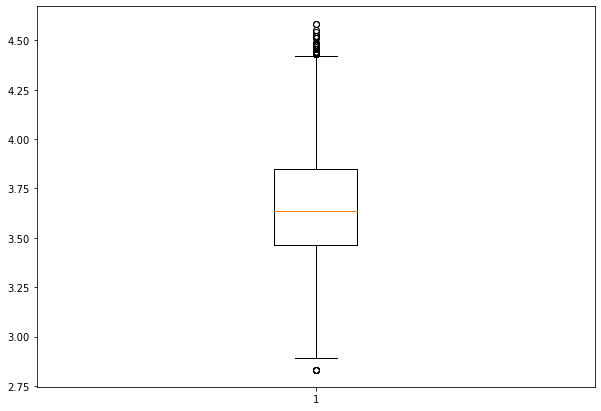

In [52]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df["log_age"])
 
# show plot
plt.show()

#### Removing Outliers 

In [53]:
# here we have defined generic function to remove outlier from any column with any dataset
def removeOutlier(dataset:pd.DataFrame, column:str, remove: bool, lowerCutoff, upperCutoff):
    Q1 = dataset[column].quantile(lowerCutoff / 100)
    Q3 = dataset[column].quantile(upperCutoff / 100)
    
    IQR = Q3-Q1
    lower_limit = Q1 - IQR*1.5
    upper_limit = Q3 + IQR*1.5
    
    # here, we have tow solution. Ether we can remove the outlier or replace it with upper limit.
    if remove:
        temp = dataset[(dataset[column] < lower_limit) or (dataset[column] > upper_limit)]
    else:
        dataset.loc[dataset[column] < lower_limit, column] = lower_limit 
        dataset.loc[dataset[column] > upper_limit, column] = upper_limit
#         We can also use Replace values of Given column by using np.where() function.
#         dataset[column] = np.where(dataset[column] > upper_limit, upper_limit, dataset[column])

In [54]:
# df[df['duration'] > 3500]['duration'].min()

In [55]:
# # here lower side there is no outlier but upper side, it is clearly visible that after 3500 the frequency descresed. 
# # we replace 3500+ value with 3500 value.
# # duration(df, 'duration', False, 0, 95)
# upper_limit = 3500
# df.loc[df['duration'] > upper_limit, 'duration'] = upper_limit 

In [56]:
# df[df['campaign'] > 34]['campaign']

In [57]:
# # here lower side there is no campaign but upper side, it is clearly visible the gap in value after 35. So we set 35 as cutoff value 
# # we replace 3500+ value with 3500 value.
# # duration(df, 'duration', False, 0, 95)
# upper_limit = 34
# df.loc[df['campaign'] > upper_limit, 'campaign'] = upper_limit 

In [58]:
# # here lower side there is no outlier but upper side, it is slightly noticable so we are taking 95% data.
# upper_limit = -30
# df.loc[df['cons.conf.idx'] > upper_limit, 'cons.conf.idx'] = upper_limit 

In [59]:
# fig,axes = plt.subplots(4, 3, figsize=(18, 20))
# fig.suptitle('Boxplot graph')
# count = 0;
# for i in range(4):
#     for j in range(3):
#         if( count < len(numerical_var)):
#             sns.boxplot(ax=axes[i,j], x=numerical_var[count], data=df)
#             count = count + 1

In above graph, we can see that we have hanlded outlier point at some extent.

# *Data Analysis

## Target Variable Analysis

<AxesSubplot:title={'center':'Target y'}, xlabel='y', ylabel='% outcomes'>

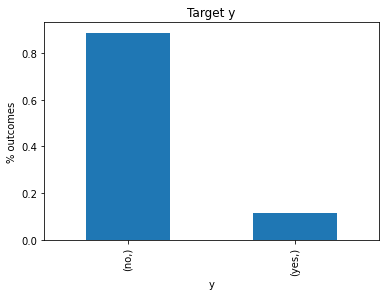

In [60]:
df[target_var].value_counts(normalize=True).plot(kind="bar", ylabel = "% outcomes", title = "Target y")

The data suggest an imbalance in the target variable which means very small proportion of the people agreed to buy the term deposit (10%) compared to people who did not (90%). This can affect the performance of our model so an oversampling technique must be applied before model building. 

In [61]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month-day,log_age
0,56,housemaid,married,basic 4y,no,no,no,telephone,5,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5-mon,4.025352
1,57,services,married,high school,NaN,no,no,telephone,5,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5-mon,4.043051
2,37,services,married,high school,no,yes,no,telephone,5,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5-mon,3.610918
3,40,admin,married,basic 6y,no,no,no,telephone,5,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5-mon,3.688879
4,56,services,married,high school,no,no,yes,telephone,5,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5-mon,4.025352


In [62]:
categorical_var

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome']

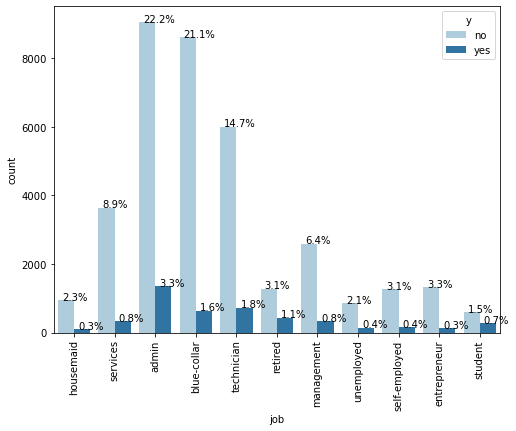

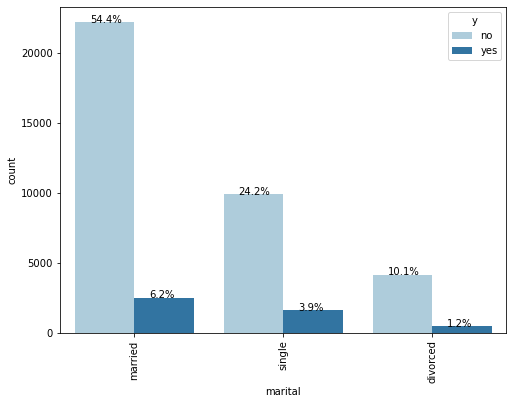

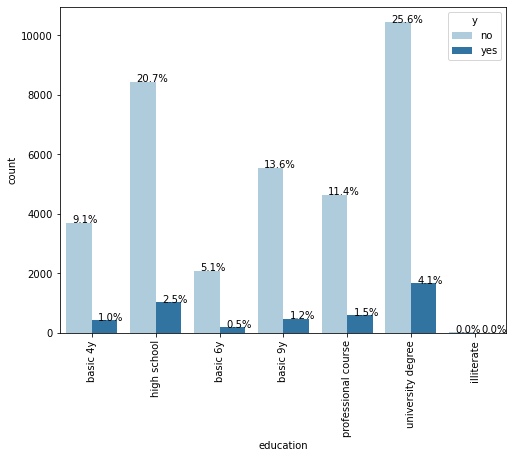

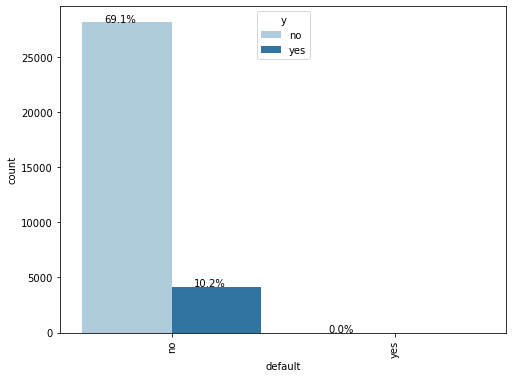

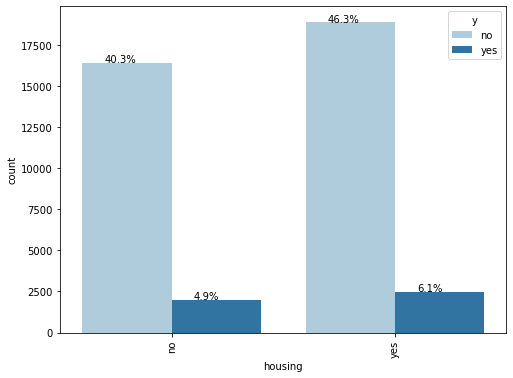

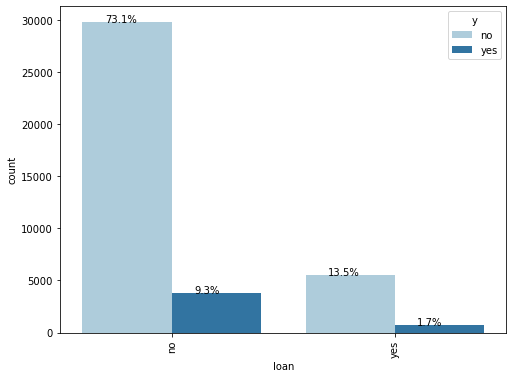

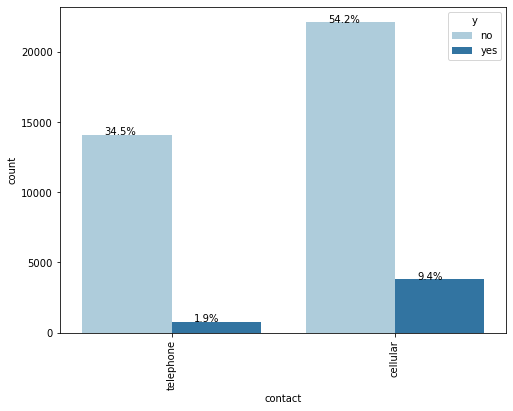

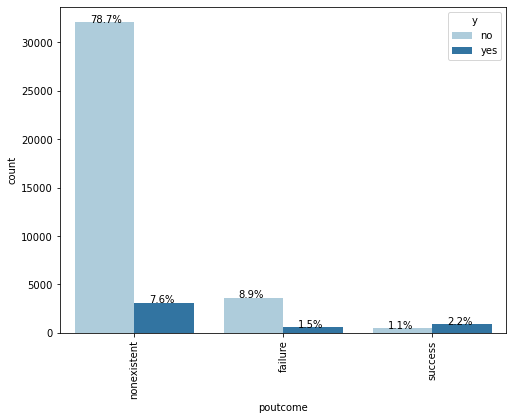

In [63]:
for var in categorical_var:
    plt.figure(figsize = (8,6))
    total = len(df[var])
    sns.set_palette("Paired")
    ax = sns.countplot(x = var, data = df, hue = 'y')
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    plt.xticks(rotation=90)
    plt.show()

Points to be Noted: 
1. From the First graph, we analyzed that, the professions have 12 different values. Out of that 'admin', 'blue-coller', and 'technician' are around 66% of the entire data. So we can say that mainly people are associated with these three jobs. They are respectively 25.5%, 22.7% and 16.5%. Also, the acceptance ratio is highest in admin among all these three while overall it is highest in students value.  
2. Married people are more than 50% in our analysis while singles are nearly a quarter of the entire dataset. Out of all three categories, married and divorced are subscribed at the same rate 12.5% while divorced single shows a better ratio around 17%. (Fig 2)
3. There is a different kind of group set which has seven types of education in which high school pass out and university graduate are more than rest. We saw that there are 0% illiterate people in our Dataset which good sign. Also, it seems like university graduates are more inclined to subscribe compared to the rest.
4. default represents whether the user has a credit card or not. According to the graph, a possibility of a credit card is almost zero. 
5. Relationship between loan and user is a majority of the users did not have any loan but the possibility of the user having a loan or not a loan is the same to subscribe.
6. Majority of the contact available is a cellular phone. It will not directly impact the output but it is shows that people whose celluar contact is there are more subscribers than a telephonic numbers.
7. The outcome of a previous marketing campaign is a key feature for determining user behavior. If the previous campaign is successful then the user is more likely to subscribe than reject it. But if it is a failure then also some portion of the people still subscribe to the new one. 

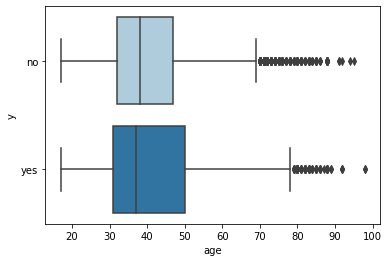

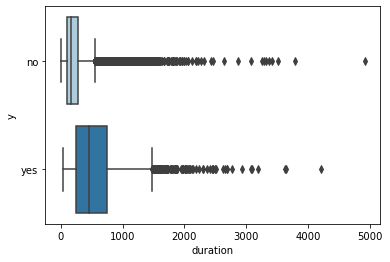

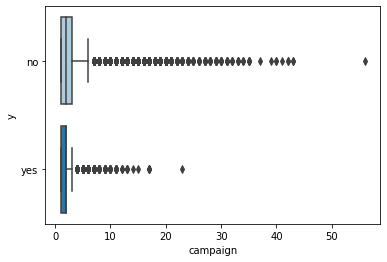

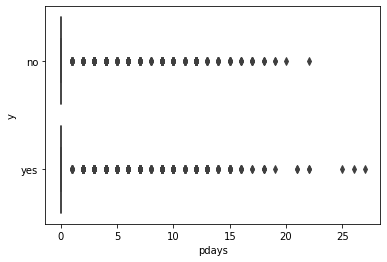

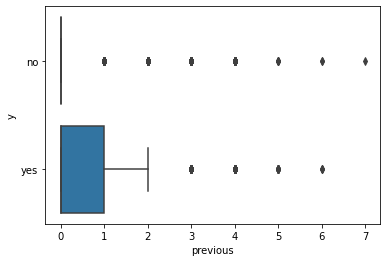

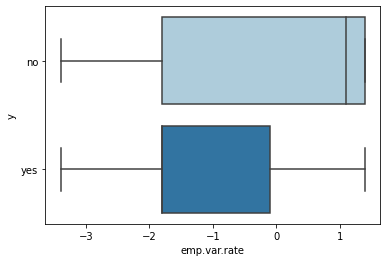

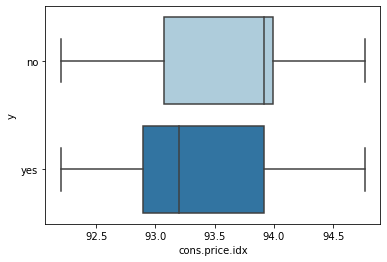

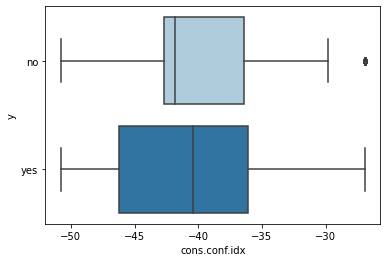

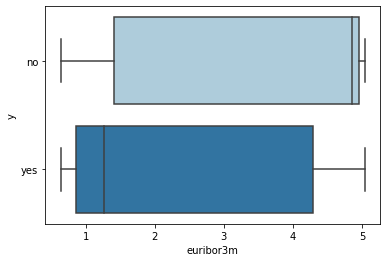

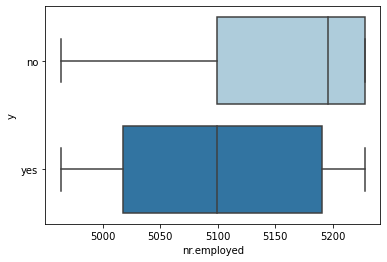

In [64]:
for var in numerical_var:
    sns.boxplot(data = df, y = 'y', x = var, dodge=False)
    plt.show()

Points to be Noted: 
1. 

In [65]:
mask_yes = df["y"] == "yes"
mask_no = df["y"] == "no"

In [66]:
df_y = df[mask_yes]
df_n = df[mask_no]

In [67]:
df_y.shape

(4593, 23)

In [68]:
df_n.shape

(36182, 23)

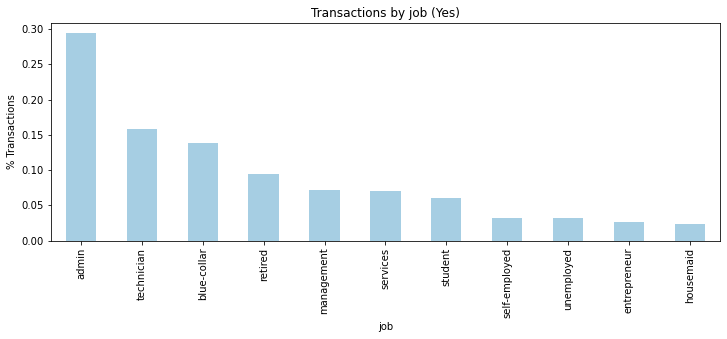

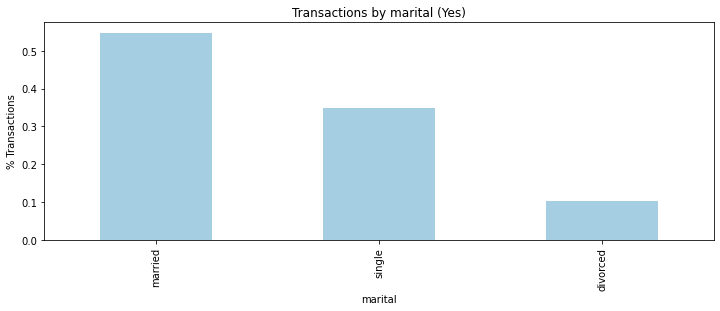

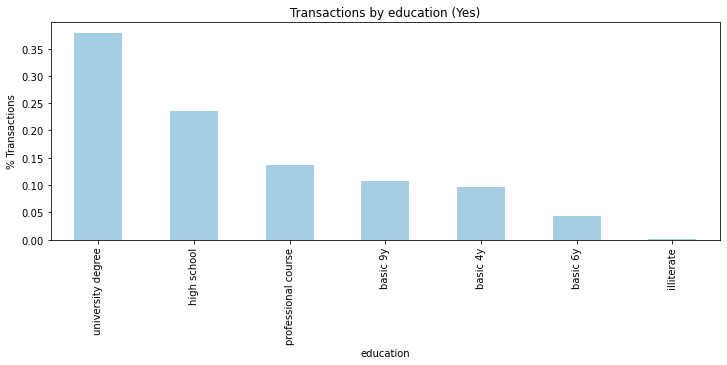

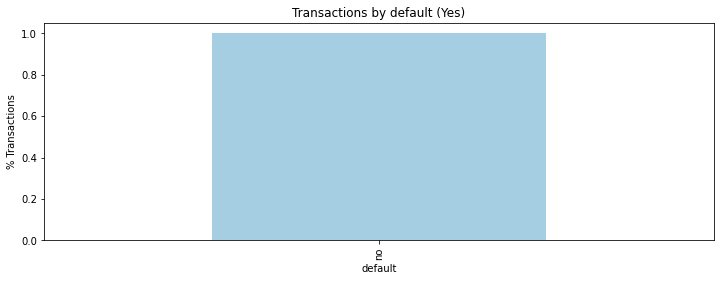

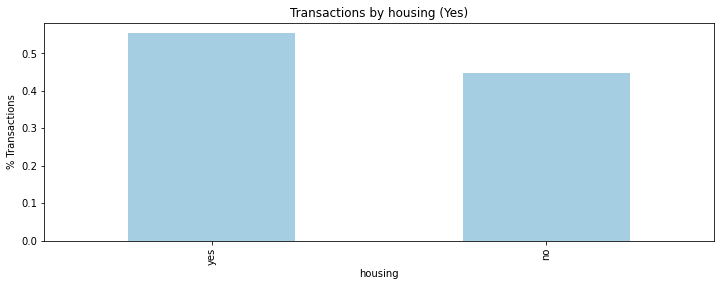

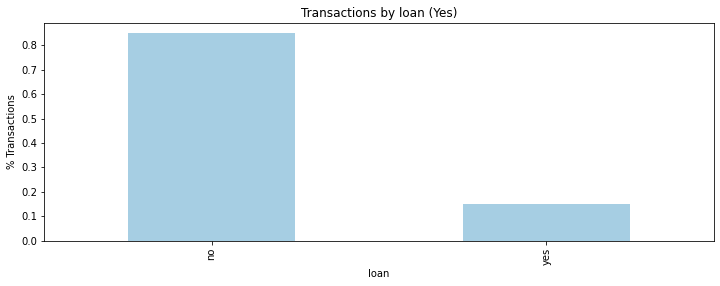

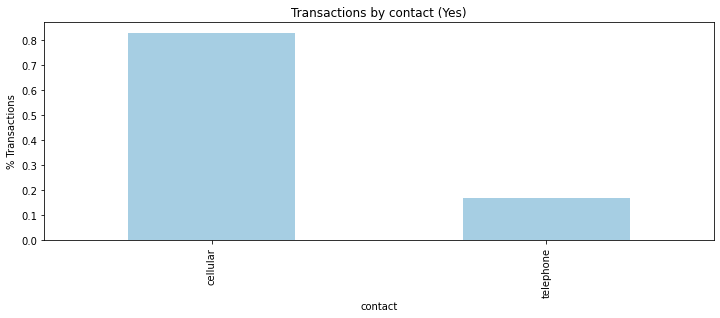

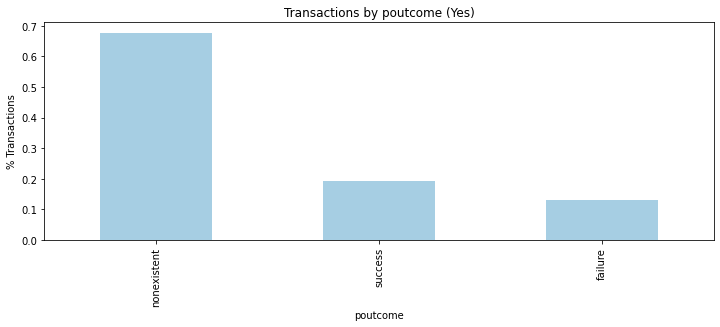

In [69]:
for var in categorical_var:
    
    plt.figure(figsize=(12,4))
    
    # plot transformed variable vs sale price
    df_y[var].value_counts(normalize = True).plot(
    kind="bar",
    xlabel=f"{var}",
    ylabel="% Transactions",
    title=f"Transactions by {var} (Yes)"
    )
                
    plt.show()

Points to be Noted: 
1. From the graph we can clearly see that admin and technician are highest among the portion who subscribe and housemaid, unemployed are lowest. An entrepreneur is also lowest is a bit confusing in a logical way but that is given in data.
2. Married, single and divorced are sequence high to low in the context of subscription.
3. As we have seen earlier, university graduates and high school pass out are the highest number of the population who go with subscription while illiterate and basic 6y are lowest among all. The rest is quite the same in range.
4. The person who has a Cellular phone is subscribed more than having a telephone number.
5. Outcome of the previous marketing campaign in the context of subscription is not affected more and the success and failure ratio is almost the same.

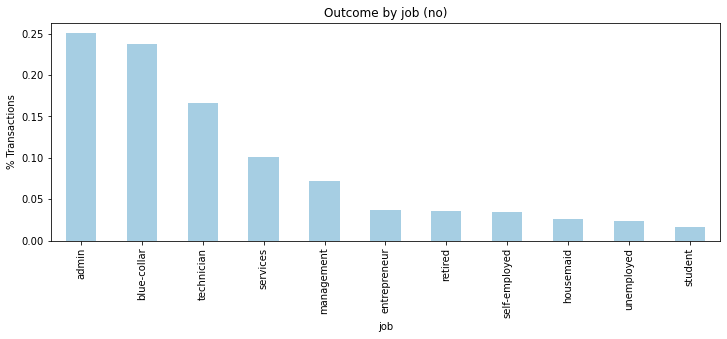

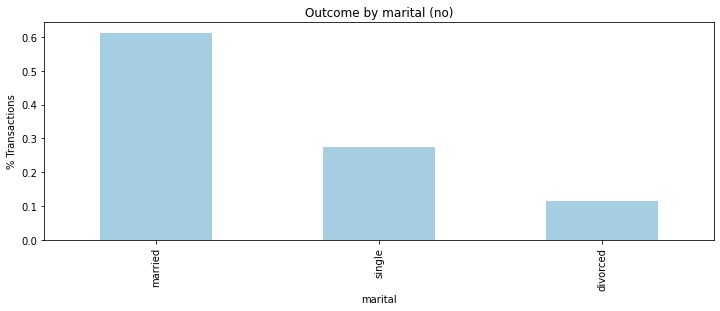

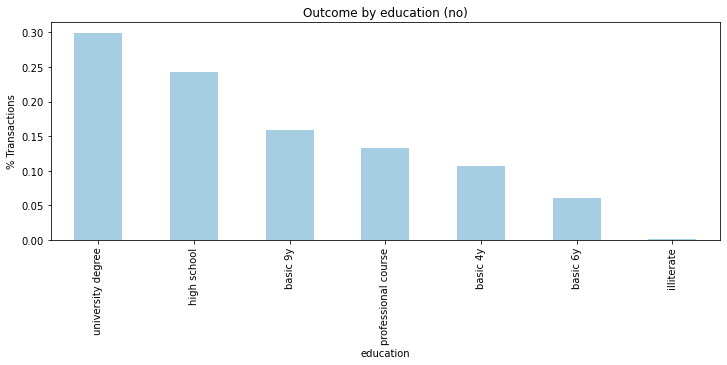

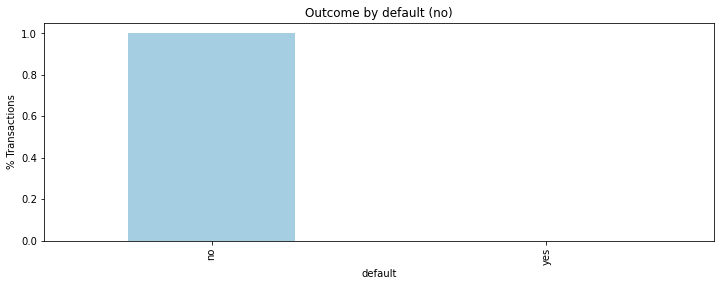

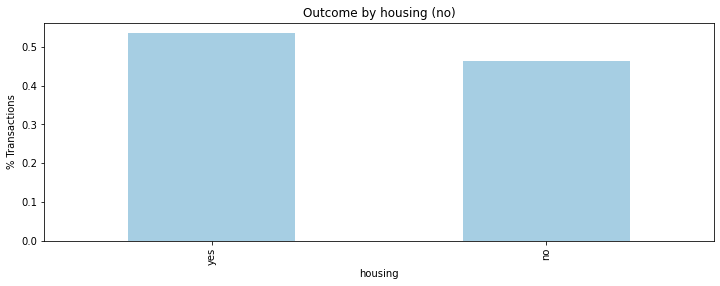

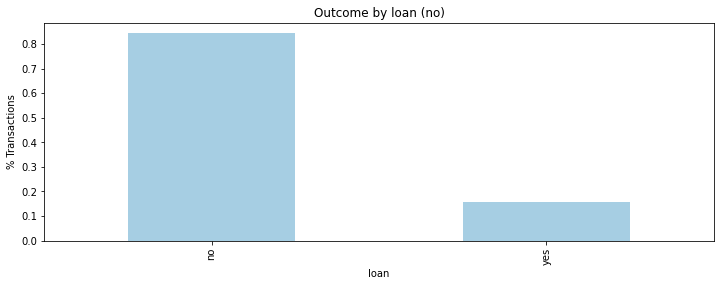

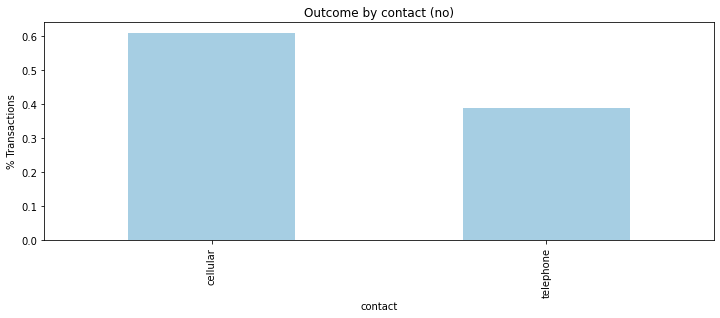

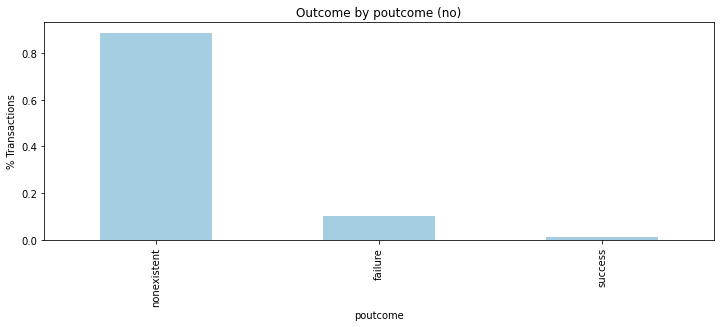

In [70]:
for var in categorical_var:
    
    plt.figure(figsize=(12,4))
    
    # plot transformed variable vs sale price
    df_n[var].value_counts(normalize = True).plot(
    kind="bar",
    xlabel=f"{var}",
    ylabel="% Transactions",
    title=f"Outcome by {var} (no)"
    )
                
    plt.show()

Points to be Noted: 
1. For the job, marital and education feature, distribution and relation of 'no' is the same as 'yes' that we have seen in the previous explanation.

2. But here the noticeable point is the default feature. Those who did not have a credit card are more inclined towords 'no' to subscriptions. 